<b>Importing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<b>Data Collection

Importing 3 datasets:Customers, Transactions, Products

In [2]:
customers=pd.read_csv("Customers.csv")
customers.sample(5)

,CustomerID,CustomerName,Region,SignupDate
94,C0095,William Walker,South America,2023-03-04
0,C0001,Lawrence Carroll,South America,2022-07-10
118,C0119,David Armstrong,Europe,2023-11-13
134,C0135,Toni Weaver,Europe,2022-08-23
119,C0120,Francisco Diaz,South America,2023-01-13


In [3]:
products=pd.read_csv("Products.csv")
products.sample(4)

,ProductID,ProductName,Category,Price
6,P007,SoundWave Cookbook,Books,420.15
64,P065,BookWorld Sweater,Clothing,427.61
97,P098,SoundWave Laptop,Electronics,299.93
94,P095,BookWorld Cookware Set,Home Decor,227.26


In [4]:
transactions=pd.read_csv("Transactions.csv")
transactions.sample(6)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
84,T00035,C0142,P069,2024-08-20 15:26:04,2,201.62,100.81
465,T00284,C0022,P059,2024-01-15 07:06:38,4,1212.80,303.20
882,T00437,C0143,P005,2024-09-11 20:41:10,4,1717.24,429.31
685,T00429,C0030,P055,2024-12-15 01:23:26,3,385.59,128.53
807,T00147,C0117,P099,2024-08-05 20:03:50,4,1417.16,354.29
636,T00084,C0045,P015,2024-08-02 13:45:45,4,635.72,158.93


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [6]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB


In [7]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [8]:
#Converting column SignupDate data type from object to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [9]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB


In [10]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 54.8+ KB


In [11]:
customers.isna().count()

CustomerID      200
CustomerName    200
Region          200
SignupDate      200
dtype: int64

In [12]:
transactions.isna().count()

TransactionID      1000
CustomerID         1000
ProductID          1000
TransactionDate    1000
Quantity           1000
TotalValue         1000
Price              1000
dtype: int64

In [13]:
products.isna().count()

ProductID      100
ProductName    100
Category       100
Price          100
dtype: int64

In [13]:
regions_counts=customers['Region'].value_counts()
print(regions_counts)

South America    59
Europe           50
North America    46
Asia             45
Name: Region, dtype: int64


<b>EDA(Exploratory Data Analysis)

Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: Category, dtype: int64


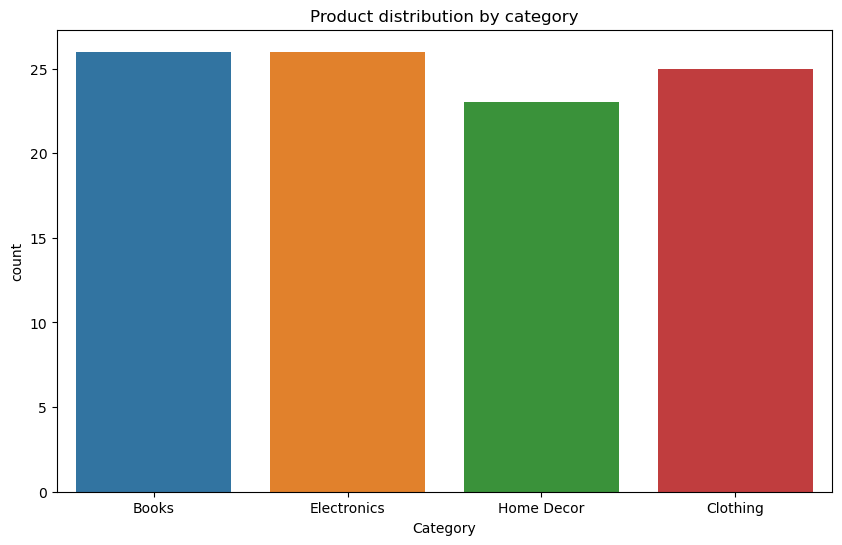

In [14]:
print(products['Category'].value_counts())
plt.figure(figsize=(10,6))
sns.countplot(x='Category',data=products)
plt.title("Product distribution by category")
plt.show()

Most number of product distribution by category is Book and Electronic items

South America    59
Europe           50
North America    46
Asia             45
Name: Region, dtype: int64


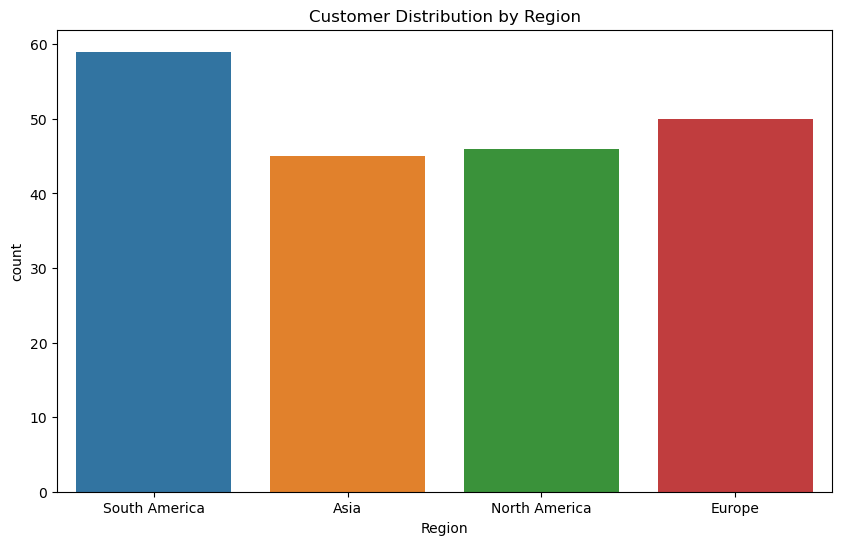

In [15]:
#To check no of customers in different regions
print(customers['Region'].value_counts())
plt.figure(figsize=(10,6))
sns.countplot(x='Region',data=customers)
plt.title('Customer Distribution by Region')
plt.show()

Most Customers are from South America region and least is Asia region.

In [18]:
#merging datasets transactions,customers and products in order to get information about in which region sales is high
merged_datasets=transactions.merge(customers,on='CustomerID').merge(products,on='ProductID')
merged_datasets.sample(5)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
919,T00953,C0056,P087,2024-03-07 21:09:48,2,580.34,290.17,Erika Fernandez,Asia,2024-04-12,TechPro Running Shoes,Clothing,290.17
40,T00908,C0089,P079,2024-02-12 15:27:25,4,1669.48,417.37,Paul Carter,Europe,2024-04-02,ActiveWear Rug,Home Decor,417.37
253,T00943,C0133,P046,2024-01-01 10:21:22,1,366.07,366.07,Gwendolyn Carter,South America,2023-03-11,BookWorld Sweater,Clothing,366.07
220,T00394,C0063,P097,2024-03-25 13:47:30,4,1277.36,319.34,Wayne Ferguson,Europe,2024-02-05,BookWorld Cookbook,Books,319.34
263,T00539,C0159,P047,2024-12-13 17:21:14,4,637.32,159.33,Austin Miller,Asia,2022-08-06,ComfortLiving Cookware Set,Home Decor,159.33


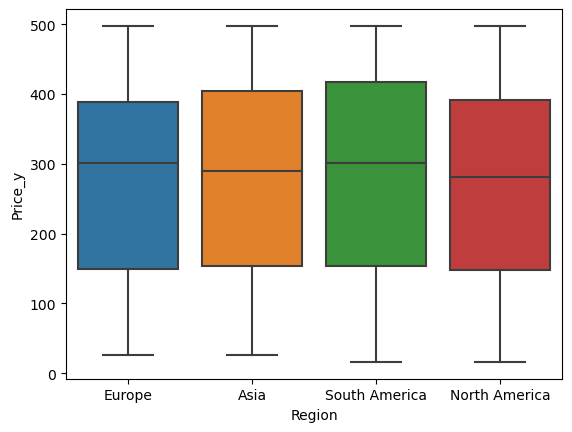

In [19]:
sns.boxplot(x='Region',y='Price_y',data=merged_datasets)
plt.show()